In [ ]:
# default_exp umap

# UMAP

> API details.

In [1]:
#hide
from nbdev.showdoc import *

In [48]:
# %load common.py
# export

import pandas
import os
import numpy
import seaborn
import logging
import matplotlib.pyplot as plt
from matplotlib import cm
from importlib import reload

In [39]:
# export 

import umap
import fcsparser

In [59]:
meta, df = fcsparser.parse("D:/Experiment_data/weizmann/EhV/201/aggregates/non_intensity_T04567_R123.fcs")
df_meta = df[["label", "replicate", "timepoint"]].astype(int)
df_meta["timepoint"] = df_meta["timepoint"].map(lambda a: meta["timepoint"].split(",")[a])
df_meta["replicate"] = df_meta["replicate"].map(lambda a: meta["replicate"].split(",")[a])
df = df.drop(columns=["label", "replicate", "timepoint"])

In [8]:
projector = umap.UMAP()
projection = projector.fit_transform(df)
projection = pandas.DataFrame(projection, columns=["dim_1", "dim_2"])

# Plot umap

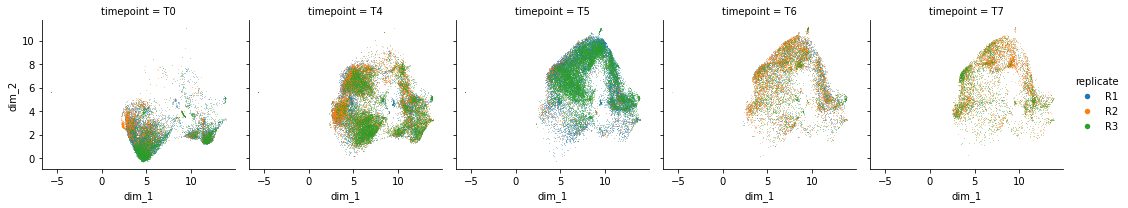

In [68]:
grid = seaborn.FacetGrid(col="timepoint", hue="replicate", data=pandas.concat([df, df_meta, projection], axis=1))
grid = grid.map(plt.scatter, "dim_1", "dim_2", s=0.5, linewidths=0, edgecolors=None, alpha=0.5)
grid.add_legend()

for handle in grid._legend.legendHandles:
    handle.set_sizes([30])
    handle.set_alpha(1.0)